# Descriptive Modeling with Python
Applying K-Means (Clustering) to a dataset of Covid Cases in Antioquia, Colombia.

### Importing libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

### Data preparation

In [2]:
data = pd.read_csv("Covid_Antioquia.csv", encoding="utf-8")
data.head(-10)

,edad,Edad,Sexo,tiempo_inicioSintomas_diagnostico,Pertenencia étnica,Estado
0,50,Adulto,F,9,Otro,Recuperado
1,55,Adulto,M,5,Otro,Recuperado
2,25,Joven_adulto,M,3,Otro,Recuperado
3,27,Joven_adulto,F,5,Otro,Recuperado
4,26,Joven_adulto,F,5,Otro,Recuperado
...,...,...,...,...,...,...
158438,29,Joven_adulto,F,13,Otro,Recuperado
158439,45,Adulto,F,13,Otro,Recuperado
158440,13,Joven,F,13,Otro,Recuperado
158441,44,Adulto,F,13,Otro,Recuperado


In [3]:
data= data.rename(columns={'Pertenencia étnica': 'pertenencia_etnica'})
data=data[['Edad', 'Sexo', 'tiempo_inicioSintomas_diagnostico', 'pertenencia_etnica', 'Estado']]
data.head(-10)

,Edad,Sexo,tiempo_inicioSintomas_diagnostico,pertenencia_etnica,Estado
0,Adulto,F,9,Otro,Recuperado
1,Adulto,M,5,Otro,Recuperado
2,Joven_adulto,M,3,Otro,Recuperado
3,Joven_adulto,F,5,Otro,Recuperado
4,Joven_adulto,F,5,Otro,Recuperado
...,...,...,...,...,...
158438,Joven_adulto,F,13,Otro,Recuperado
158439,Adulto,F,13,Otro,Recuperado
158440,Joven,F,13,Otro,Recuperado
158441,Adulto,F,13,Otro,Recuperado


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158453 entries, 0 to 158452
Data columns (total 5 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Edad                               158453 non-null  object
 1   Sexo                               158453 non-null  object
 2   tiempo_inicioSintomas_diagnostico  158453 non-null  int64 
 3   pertenencia_etnica                 158453 non-null  object
 4   Estado                             158453 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.0+ MB


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158453 entries, 0 to 158452
Data columns (total 5 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Edad                               158453 non-null  object
 1   Sexo                               158453 non-null  object
 2   tiempo_inicioSintomas_diagnostico  158453 non-null  int64 
 3   pertenencia_etnica                 158453 non-null  object
 4   Estado                             158453 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.0+ MB


#### Object to Category

In [6]:
# Objects to categorys
data['Edad'] = data['Edad'].astype('category')
data['Sexo'] = data['Sexo'].astype('category')
data['tiempo_inicioSintomas_diagnostico'] = data['tiempo_inicioSintomas_diagnostico'].astype('category')
data['pertenencia_etnica'] = data['pertenencia_etnica'].astype('category')
data['Estado'] = data['Estado'].astype('category')


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158453 entries, 0 to 158452
Data columns (total 5 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Edad                               158453 non-null  category
 1   Sexo                               158453 non-null  category
 2   tiempo_inicioSintomas_diagnostico  158453 non-null  category
 3   pertenencia_etnica                 158453 non-null  category
 4   Estado                             158453 non-null  category
dtypes: category(5)
memory usage: 775.1 KB


In [7]:
data.describe()

,Edad,Sexo,tiempo_inicioSintomas_diagnostico,pertenencia_etnica,Estado
count,158453,158453,158453,158453,158453
unique,6,2,22,3,2
top,Adulto,F,15,Otro,Recuperado
freq,65579,79670,56602,153686,155130


<AxesSubplot:>

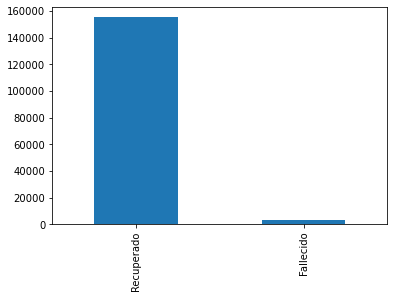

In [8]:
data['Estado'].value_counts().plot(kind='bar')

In [9]:
data['Estado'].value_counts()

Recuperado    155130
Fallecido       3323
Name: Estado, dtype: int64

# Modeling with K-means (Clustering)

### Categories to numbers (dummies)

In [10]:
data = pd.get_dummies(data, columns=['Edad', 'tiempo_inicioSintomas_diagnostico', 'pertenencia_etnica'], drop_first=False)
data = pd.get_dummies(data, columns=['Sexo','Estado'], drop_first=True)

data.head()

,Edad_Adulto,Edad_Adulto_mayor,Edad_Anciano,Edad_Infante,Edad_Joven,Edad_Joven_adulto,tiempo_inicioSintomas_diagnostico_-20,tiempo_inicioSintomas_diagnostico_0,tiempo_inicioSintomas_diagnostico_1,tiempo_inicioSintomas_diagnostico_2,...,tiempo_inicioSintomas_diagnostico_16,tiempo_inicioSintomas_diagnostico_17,tiempo_inicioSintomas_diagnostico_18,tiempo_inicioSintomas_diagnostico_19,tiempo_inicioSintomas_diagnostico_20,pertenencia_etnica_Indigena,pertenencia_etnica_Negro,pertenencia_etnica_Otro,Sexo_M,Estado_Recuperado
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


### Learning

In [11]:
from sklearn.cluster import KMeans 

k=12

model = KMeans(n_clusters=k, max_iter=100)

# doing the learning
model.fit(data)

KMeans(max_iter=100, n_clusters=12)

### Model evaluation

In [12]:
print(model.inertia_)

129077.07195485846


### Profiling

In [13]:
centroids=pd.DataFrame(model.cluster_centers_, columns=data.columns.values)

centroids.round(0)

,Edad_Adulto,Edad_Adulto_mayor,Edad_Anciano,Edad_Infante,Edad_Joven,Edad_Joven_adulto,tiempo_inicioSintomas_diagnostico_-20,tiempo_inicioSintomas_diagnostico_0,tiempo_inicioSintomas_diagnostico_1,tiempo_inicioSintomas_diagnostico_2,...,tiempo_inicioSintomas_diagnostico_16,tiempo_inicioSintomas_diagnostico_17,tiempo_inicioSintomas_diagnostico_18,tiempo_inicioSintomas_diagnostico_19,tiempo_inicioSintomas_diagnostico_20,pertenencia_etnica_Indigena,pertenencia_etnica_Negro,pertenencia_etnica_Otro,Sexo_M,Estado_Recuperado
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,...,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,1.0,0.0,1.0
4,-0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.0,1.0
5,-0.0,-0.0,-0.0,0.0,-0.0,1.0,0.0,-0.0,0.0,1.0,...,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,1.0,1.0,1.0
6,-0.0,0.0,-0.0,-0.0,1.0,0.0,-0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7,-0.0,1.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
8,-0.0,-0.0,1.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,-0.0,-0.0,-0.0,0.0,-0.0,1.0,0.0,-0.0,0.0,0.0,...,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [14]:
# Cluster asigned to each row
data['cluster']=model.labels_

data.head(-10)

,Edad_Adulto,Edad_Adulto_mayor,Edad_Anciano,Edad_Infante,Edad_Joven,Edad_Joven_adulto,tiempo_inicioSintomas_diagnostico_-20,tiempo_inicioSintomas_diagnostico_0,tiempo_inicioSintomas_diagnostico_1,tiempo_inicioSintomas_diagnostico_2,...,tiempo_inicioSintomas_diagnostico_17,tiempo_inicioSintomas_diagnostico_18,tiempo_inicioSintomas_diagnostico_19,tiempo_inicioSintomas_diagnostico_20,pertenencia_etnica_Indigena,pertenencia_etnica_Negro,pertenencia_etnica_Otro,Sexo_M,Estado_Recuperado,cluster
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,2
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,1,10
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,9
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158438,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,4
158439,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,2
158440,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,6
158441,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,2


<AxesSubplot:>

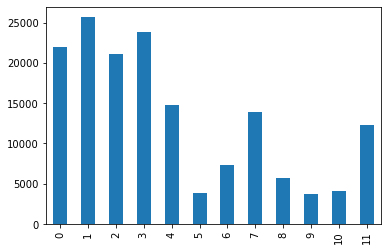

In [15]:
# Number of data in each cluster
data['cluster'].value_counts().plot(kind='bar')